In [2]:
import tensorflow as tf
import pandas as pd 
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras import *

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
x1 = np.random.uniform(100, size =(1000, 13))
# x2 = np.random.uniform(100, size =(22544, 116, 1))
y1 = np.random.randint(100, size =(1000,13), dtype = np.int32)
# y2 = np.random.randint(2, size =(22544, ), dtype = np.int32)

# train_df = pd.read_csv('data/50_Startups.csv')

# labelencoder = LabelEncoder()
# train_df['State'] = labelencoder.fit_transform(train_df['State'])
# train_labels = train_df.pop('Profit')

# scaler = StandardScaler()
# train_df = scaler.fit_transform(train_df)
# train_df

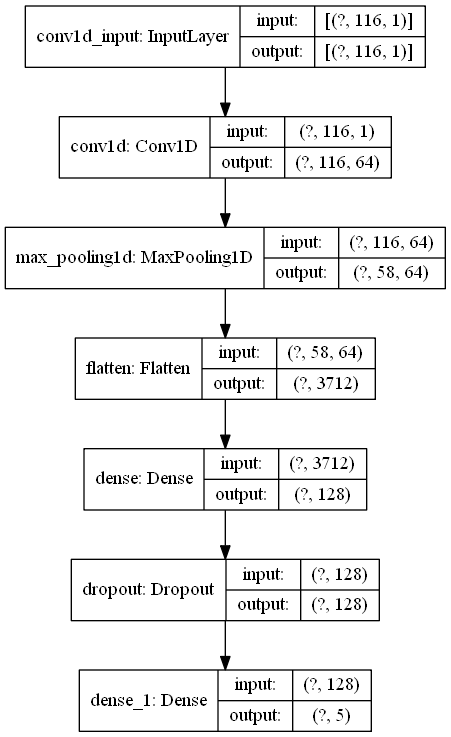

In [3]:
def create_model2():
    model = Sequential()
    model.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape = (x2.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation="softmax"))
    
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

def create_model3():
    input1 = tf.keras.Input(shape=(5,5,), name = 'I1')
    
    hidden1 = tf.keras.layers.LSTM(units = 4)(input1)
    hidden2 = tf.keras.layers.LSTM(units = 4)(input2)
    merge = tf.keras.layers.concatenate([hidden1, hidden2])
    hidden3 = tf.keras.layers.Dense(units = 3, activation='relu')(merge)
    output1 = tf.keras.layers.Dense(units = 2, activation='softmax', name ='O1')(hidden3)
    output2 = tf.keras.layers.Dense(units = 2, activation='softmax', name = 'O2')(hidden3)
    
    model = tf.keras.models.Model(inputs = [input1,input2], outputs = [output1,output2])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



model = create_model2()
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [ ]:
model.fit(x1, y1, epochs = 1, batch_size = 32)

In [ ]:
pred = model.predict(x2)
pred

In [ ]:
history = model.fit(
    x = {'I1':x1, 'I2':x2}, 
    y = {'O1':y1, 'O2': y2},
    batch_size = 32,
    epochs = 10,
    verbose = 1,
    callbacks = None,
#     validation_data = [(val_data,new_val_data),(val_labels, new_val_labels)]
)

In [34]:
model.save_weights(
    'encoded_weight.h5', overwrite=True, save_format=None, options=None
)

OSError: Unable to create file (unable to truncate a file which is already open)

In [55]:
from sklearn.datasets import make_blobs
import pandas as pd
import tensorflow as tf

#creates an input function for a tf model
def make_input_fn(X, Y, n_epochs=None, shuffle=True, verbose=False):
    batch_len = len(Y)
    def input_fn():
        dataset = tf.data.Dataset.from_tensor_slices((dict(X), Y))
        if shuffle:
            dataset = dataset.shuffle(batch_len)
        # For training, cycle thru dataset as many times as need (n_epochs=None).
        dataset = dataset.repeat(n_epochs)
        #dividing data into batches
        dataset = dataset.batch(batch_len)
        return dataset
    return input_fn

#making data
trainX, trainY = make_blobs(n_samples=10, centers=2, n_features=3, random_state=0)

#xVals
trainX = pd.DataFrame(trainX)
trainX.columns = ['feature{}'.format(num) for num in trainX.columns]

#yVals
trainY = pd.DataFrame(trainY)
trainY.columns = ['flag']

# Defining input function
train_input_fn = make_input_fn(trainX, trainY)


#defining tf feature columns
feature_columns=[]
for feature_name in list(trainX.columns):
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))
    
#creating the estimator
n_batches = 1
est = tf.estimator.BoostedTreesClassifier(feature_columns, n_batches_per_layer=n_batches)

est.train(train_input_fn, max_steps=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Aniket\\AppData\\Local\\Temp\\tmpq8ppnzhq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:ten

In [56]:
trainX

,feature0,feature1,feature2
0,1.289338,3.449692,-0.497722
1,1.386869,4.447831,3.509541
2,1.551282,-0.662468,2.175717
3,1.926358,4.152430,1.952049
4,1.052611,-1.148741,2.030097
5,1.737308,4.425462,2.499131
6,-1.083133,-1.874816,3.074231
7,0.710480,0.005875,4.387241
8,3.167418,-2.981270,2.963641
9,1.309944,5.797866,1.850109


In [76]:
def my_input_fn(features, batch_size=256):
    """An input function for prediction."""
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

testX = pd.DataFrame(trainX.loc[0]).T

predictions = est.predict(
    input_fn=lambda: my_input_fn(testX))


In [77]:
from pprint import pprint
for pred_dict in predictions:
    pprint(pred_dict)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Aniket\AppData\Local\Temp\tmpq8ppnzhq\model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'all_class_ids': array([0, 1]),
 'all_classes': array([b'0', b'1'], dtype=object),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'logistic': array([0.17926924], dtype=float32),
 'logits': array([-1.5213063], dtype=float32),
 'probabilities': array([0.82073075, 0.17926925], dtype=float32)}


In [70]:
predictions

<generator object Estimator.predict at 0x0000023E9CFB83C8>